In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df=pd.read_csv(r"E:\Data Sets\Fraud detection\fraudTrain.csv")

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.shape

(1296675, 23)

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [10]:
df.sample(6)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
372379,372379,2019-06-21 17:25:46,374930071163758,"fraud_Hyatt, Russel and Gleichner",health_fitness,95.45,Daniel,Escobar,M,61390 Hayes Port,...,42.2203,-83.3583,31515,Police officer,1971-11-05,ffead2565618efdeaa9f8b98484d0efd,1340299546,41.598510,-83.201019,0
828202,828202,2019-12-10 03:17:43,38580485618059,fraud_Cartwright-Harris,grocery_pos,107.09,Teresa,Clark,F,1323 Derek Mission,...,48.8856,-103.0098,248,Industrial/product designer,1968-05-13,63420941b8e666aa4ab5784f4da5a55e,1355109463,49.030608,-102.360619,0
1037384,1037384,2020-03-06 07:55:28,4550599031376731,fraud_Simonis-Prohaska,misc_pos,9.07,Angela,West,F,9471 Wong Islands,...,40.7559,-82.5123,92985,Press photographer,1968-05-29,32fac5dfbec2fcfee687695d66985c54,1362556528,40.970146,-83.151722,0
869903,869903,2019-12-20 04:56:47,30266994494236,"fraud_Osinski, Ledner and Leuschke",grocery_pos,109.73,Sarah,Foster,F,77872 Andrea Glen Apt. 543,...,37.1349,-77.7364,1051,Chief Operating Officer,1976-11-21,481e87d0e1d80a08d149eebc2afa3775,1355979407,37.207732,-78.536296,0
489256,489256,2019-08-02 04:19:49,4666314527820883145,fraud_Schamberger-O'Keefe,grocery_pos,113.42,Guy,Thompson,M,5812 Ramos Oval Suite 598,...,41.0233,-98.9041,2202,"Solicitor, Scotland",1974-06-21,dc8976e86f31846e1127e1f42d2f13ca,1343881189,41.264916,-98.472240,0
1082552,1082552,2020-03-25 12:27:39,30442439074871,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,9.13,Linda,Sanchez,F,6574 William Hill Apt. 375,...,41.5744,-75.5881,6508,Training and development officer,1981-06-22,07da5fa2a726d4295ab823e7bd86517f,1364214459,41.625660,-75.667087,0


In [11]:
df.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)

In [12]:
encoder = LabelEncoder()

In [13]:
Encoding_columns=df[['merchant','category','gender','job']]

In [14]:
for column in Encoding_columns:
    df[column]=encoder.fit_transform(df[column])

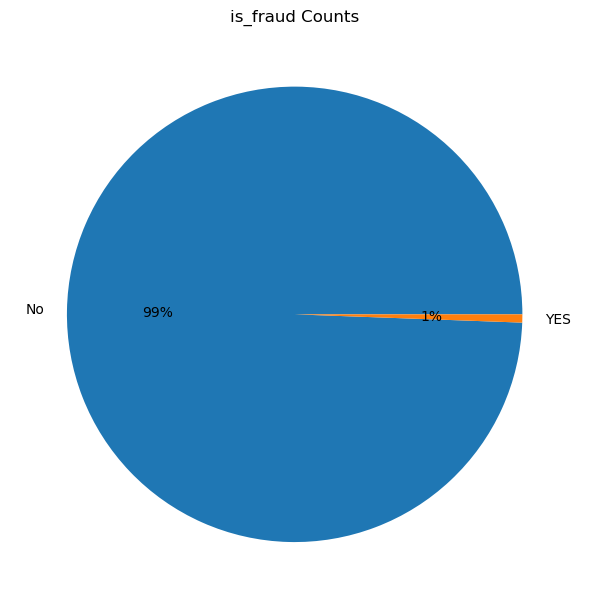

In [15]:
exit_counts = df["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [16]:
X = df.drop(columns=["is_fraud"], inplace = False)
Y = df["is_fraud"]

In [17]:
test=pd.read_csv(r"E:\Data Sets\Fraud detection\fraudTest.csv")

In [18]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [19]:
test.shape

(555719, 23)

In [20]:
X_test = df.drop(columns=["is_fraud"], inplace = False)
Y_test = df["is_fraud"]

In [21]:
model=LogisticRegression()

In [22]:
model.fit(X,Y)


LogisticRegression()

In [23]:
predicted=model.predict(X_test)

In [24]:
print('Classification report:\n', classification_report(Y_test, predicted))

C:\Users\Aqib Mehmood Malik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aqib Mehmood Malik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00   1289169
           1       0.00      0.00      0.00      7506

    accuracy                           0.99   1296675
   macro avg       0.50      0.50      0.50   1296675
weighted avg       0.99      0.99      0.99   1296675



C:\Users\Aqib Mehmood Malik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
accuracy = accuracy_score(Y_test,predicted)
accuracy

0.9942113482561166